In [3]:
import random
import gym
import gym_deeproute_stat
import numpy as np

import csv
import argparse

import logging 
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 

import matplotlib.pyplot as plt 
%matplotlib inline

In [1]:
pwd

'/home/controller/Music/deeproute-gym/tests'

In [4]:
ENV_NAME = "Deeproute-stat-v0"


In [5]:
class RandomAgent:

    def __init__(self, observation_space, action_space):
        self.action_space = action_space
 
    def act(self, state):
        return random.randrange(self.action_space)


In [6]:
env = gym.make(ENV_NAME)

observation_space = env.observation_space.shape[0]
action_space = env.action_space.n
agent = RandomAgent(observation_space, action_space)
run = 0
score = 0
MAX_RUN = 3
score_card = []
while run < MAX_RUN:
    run += 1
    state = env.reset()
    state = np.reshape(state, [1, observation_space])
    step = 0
    while True:
        step += 1
        
        action = agent.act(state)
        state_next, reward, terminal, info = env.step(action)
        #reward = reward if not terminal else -reward
        state_next = np.reshape(state_next, [1, observation_space])
        score += reward
        state = state_next
        if terminal:
            print ("Run: " + str(run)  + ", score: " + str(score))
            score_card.append((run, score))
            break
        

Run: 1, score: 8
Run: 2, score: 83
Run: 3, score: 124


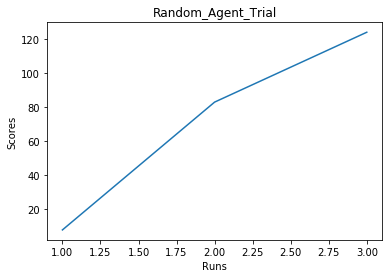

In [7]:

def draw_graph(data, title):
    # x axis values 
    x =   [x[0] for x in data]
    #print (x)
    # corresponding y axis values 
    y =  [x[1] for x in data]
    #print (y)

    # plotting the points  
    plt.plot(x, y) 
    


    # naming the x axis 
    plt.xlabel('Runs') 
    # naming the y axis 
    plt.ylabel('Scores') 

    # giving a title to my graph 
    plt.title(title) 

    # show a legend on the plot 
    #plt.legend() 

    # function to show the plot 
    plt.show() 

draw_graph(score_card, 'Random_Agent_Trial')

In [8]:
with open('random_score_card.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(score_card)


In [8]:
env.cleanup()